✅ CSV loaded successfully into SQLite database.

📊 Sales Summary:
     product  total_qty    revenue
39  S18_3232       1774  176026.63
76  S24_3856       1052  103489.89
50  S18_4600       1031  101835.00
63  S24_2300        996   99600.00
25  S18_2238        966   96300.00
..       ...        ...        ...
62  S24_2022        851   42524.98
69  S24_2972        912   42145.94
85  S32_2206        836   39237.71
59  S24_1937        844   37392.38
78  S24_3969        745   33181.66

[109 rows x 3 columns]


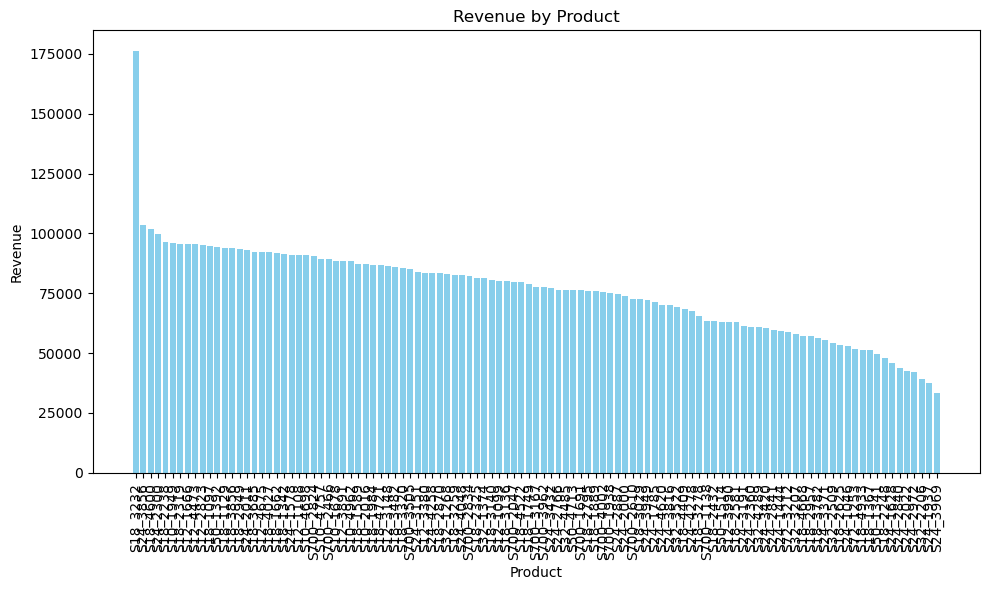

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: CSV file (same folder as notebook)
csv_file = "sales_data_sample_task 3.csv"

# Step 2: Create/Connect to SQLite database
db_file = "sales_data.db"
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Drop old table if it exists
cursor.execute("DROP TABLE IF EXISTS sales")

# Step 3: Load CSV into SQLite
df_csv = pd.read_csv(csv_file)
df_csv.to_sql("sales", conn, index=False, if_exists="replace")
print("✅ CSV loaded successfully into SQLite database.")

# Step 4: SQL query with correct column names
query = """
SELECT PRODUCTCODE AS product,
       SUM(QUANTITYORDERED) AS total_qty,
       SUM(QUANTITYORDERED * PRICEEACH) AS revenue
FROM sales
GROUP BY PRODUCTCODE
"""

df_result = pd.read_sql_query(query, conn)

# Step 5: Sort by revenue for cleaner chart
df_result = df_result.sort_values(by="revenue", ascending=False)

# Step 6: Print results
print("\n📊 Sales Summary:")
print(df_result)

# Step 7: Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_result["product"], df_result["revenue"], color="skyblue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Step 8: Close connection
conn.close()


✅ CSV loaded successfully into SQLite database.

📊 Sales Summary:
     product  total_qty    revenue
39  S18_3232       1774  176026.63
76  S24_3856       1052  103489.89
50  S18_4600       1031  101835.00
63  S24_2300        996   99600.00
25  S18_2238        966   96300.00
..       ...        ...        ...
62  S24_2022        851   42524.98
69  S24_2972        912   42145.94
85  S32_2206        836   39237.71
59  S24_1937        844   37392.38
78  S24_3969        745   33181.66

[109 rows x 3 columns]


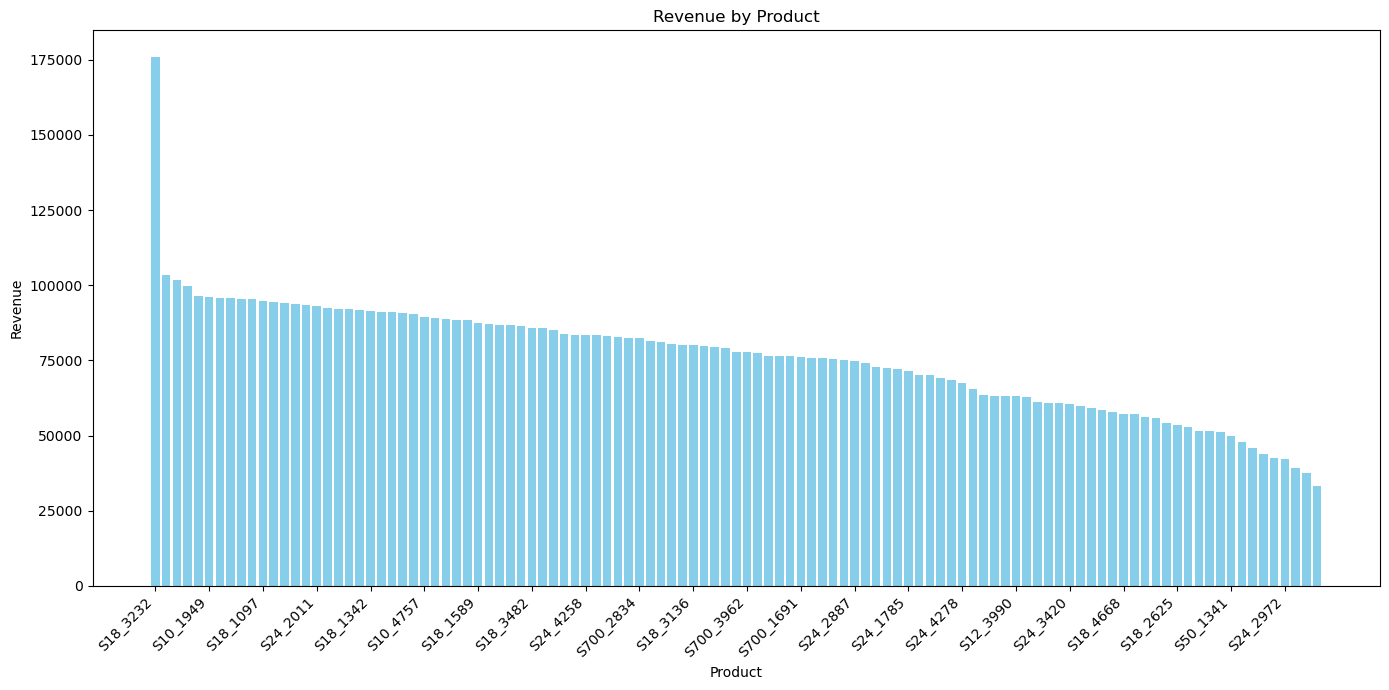

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: CSV file in the same folder as notebook
csv_file = "sales_data_sample_task 3.csv"

# Step 2: Create/Connect to SQLite database
db_file = "sales_data.db"
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Drop old table if exists
cursor.execute("DROP TABLE IF EXISTS sales")

# Step 3: Load CSV into SQLite
df_csv = pd.read_csv(csv_file)
df_csv.to_sql("sales", conn, index=False, if_exists="replace")
print("✅ CSV loaded successfully into SQLite database.")

# Step 4: SQL query (with correct columns)
query = """
SELECT PRODUCTCODE AS product,
       SUM(QUANTITYORDERED) AS total_qty,
       SUM(QUANTITYORDERED * PRICEEACH) AS revenue
FROM sales
GROUP BY PRODUCTCODE
"""

df_result = pd.read_sql_query(query, conn)

# Step 5: Sort by revenue
df_result = df_result.sort_values(by="revenue", ascending=False)

# Step 6: Print results
print("\n📊 Sales Summary:")
print(df_result)

# Step 7: Plot bar chart (improved readability)
plt.figure(figsize=(14, 7))
plt.bar(df_result["product"], df_result["revenue"], color="skyblue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")

# Show only every 5th product label to avoid clutter
plt.xticks(ticks=range(0, len(df_result["product"]), 5),
           labels=df_result["product"].iloc[::5],
           rotation=45, ha="right")

plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Step 8: Close connection
conn.close()
